In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\MACHINE_LEARNING\chip_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [5]:
df.isnull().sum()
df.describe()

,Unnamed: 0,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
count,4854.000000,4845.000000,4228.000000,4139.000000,4143.000000,4854.000000,536.000000,1948.000000,1306.000000
mean,2426.500000,55.109598,81.359981,188.440445,1929.922279,1484.406057,8397.459851,2134.756653,363.670511
std,1401.373433,44.998676,76.807808,126.189383,4044.891098,1066.701523,13799.551131,3898.431487,1145.931856
min,0.000000,0.000000,1.000000,1.000000,8.000000,100.000000,10.020000,12.800000,3.600000
25%,1213.250000,22.000000,33.000000,104.000000,154.000000,590.000000,768.800000,257.300000,38.295000
50%,2426.500000,40.000000,65.000000,148.000000,624.000000,1073.500000,2965.500000,696.000000,89.280000
75%,3639.750000,90.000000,100.000000,239.000000,1550.000000,2400.000000,10600.000000,2116.750000,220.000000
max,4853.000000,250.000000,900.000000,826.000000,54200.000000,4700.000000,184600.000000,40000.000000,11540.000000


Numerical Missing Count

In [6]:
df.select_dtypes(include=['int64', 'float64']).isnull().sum()


Unnamed: 0                  0
Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
Freq (MHz)                  0
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64

In [7]:
df.select_dtypes(include=['int64', 'float64']).isnull().mean() * 100


Unnamed: 0                0.000000
Process Size (nm)         0.185414
TDP (W)                  12.896580
Die Size (mm^2)          14.730119
Transistors (million)    14.647713
Freq (MHz)                0.000000
FP16 GFLOPS              88.957561
FP32 GFLOPS              59.868150
FP64 GFLOPS              73.094355
dtype: float64

Categorical Missing count

In [8]:
df.select_dtypes(include=['object']).isnull().sum()


Product         0
Type            0
Release Date    0
Foundry         0
Vendor          0
dtype: int64

In [9]:
df.select_dtypes(include=['object']).isnull().mean() * 100


Product         0.0
Type            0.0
Release Date    0.0
Foundry         0.0
Vendor          0.0
dtype: float64

In [10]:
missing_percent = df.isnull().mean() * 100



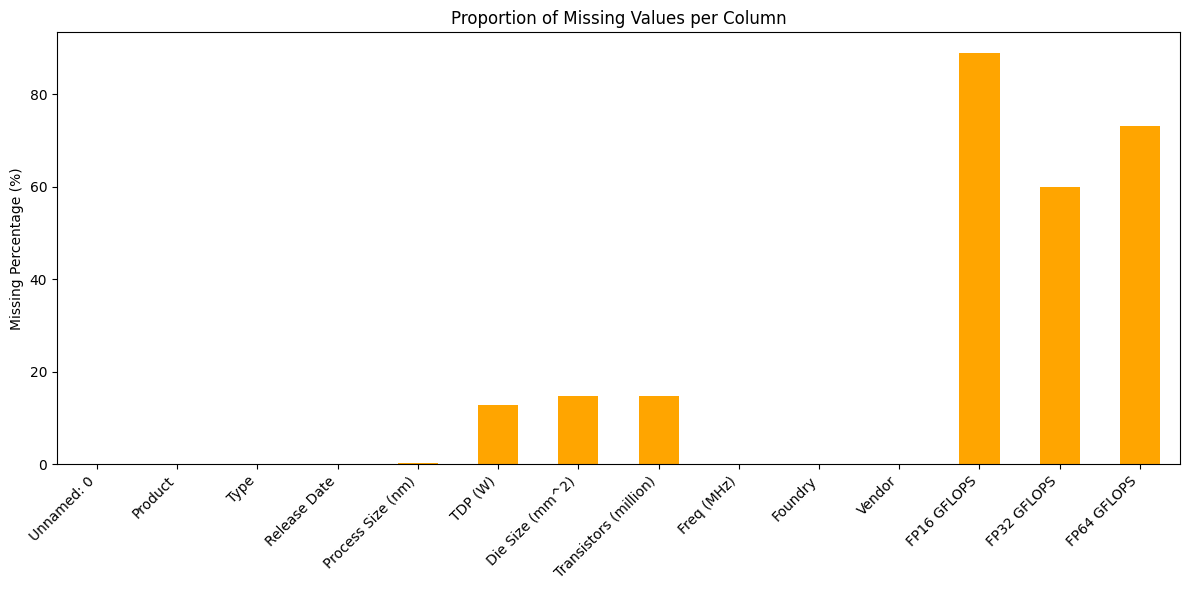

In [11]:
plt.figure(figsize=(12, 6))
missing_percent.plot(kind='bar', color='orange')
plt.ylabel("Missing Percentage (%)")
plt.title("Proportion of Missing Values per Column")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




The bar hart has two main types of missingness
1.MNAR (Missing Not At Random)
- Observed in columns like FP16, FP32, and FP64 GFLOPS, which have the highest missing percentages.
-These values are typically missing because certain chips do not support those operations, meaning the missingness is inherently tied to the actual (unavailable) value.

2.MAR (Missing At Random)
-Seen in moderate missingness columns like TDP, Die Size, Transistors, Process Size.
-The missingness in these columns likely depends on other factors such as chip type, vendor, or release year, not the value itself.

3.No MCAR (Missing Completely At Random) detected
-The pattern is not random, because missingness clusters in specific performance-related features.

Correlation of Missingness

In [12]:
# correlation of missingness
missing_corr = df.isnull().corr()

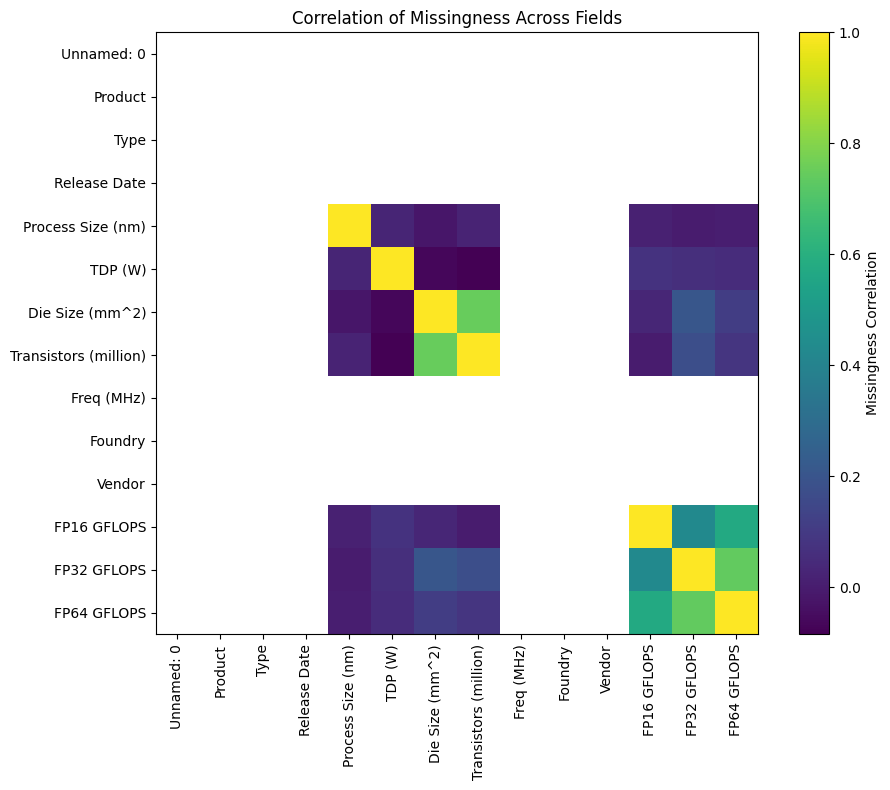

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(missing_corr, interpolation='nearest')
plt.xticks(range(len(missing_corr)), missing_corr.columns, rotation=90)
plt.yticks(range(len(missing_corr)), missing_corr.columns)
plt.colorbar(label="Missingness Correlation")
plt.title("Correlation of Missingness Across Fields")
plt.tight_layout()
plt.show()

The missingness correlation heatmap generated is to assess whether missing values occur independently or follow identifiable patterns within the dataset. The analysis shows a strong positive correlation among the FP16, FP32, and FP64 GFLOPS fields, indicating that these performance metrics are typically missing together. A moderate correlation is also observed between Die Size and Transistor Count, suggesting these specifications are often jointly unreported. In contrast, most other variables exhibit weak or negligible missingness correlation, implying their missing values occur independently. Overall, the dataset contains both structured and unstructured missingness, with clear clustering in specific groups of attributes.

Dealing with missing values

In [14]:
# 1. Drop high-missingness cols
cols_to_drop = ['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']
df_clean = df.drop(columns=cols_to_drop)


In [15]:
# 2. Median imputation for numeric fields
median_cols = ['TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Process Size (nm)']

for col in median_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [16]:
df_clean.head()

,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,148.0,624.0,2600.0,Intel,Intel
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD


In [17]:
# Numerical colums
num_cols = [
    "Process Size (nm)",
    "TDP (W)",
    "Die Size (mm^2)",
    "Transistors (million)",
    "Freq (MHz)"
]


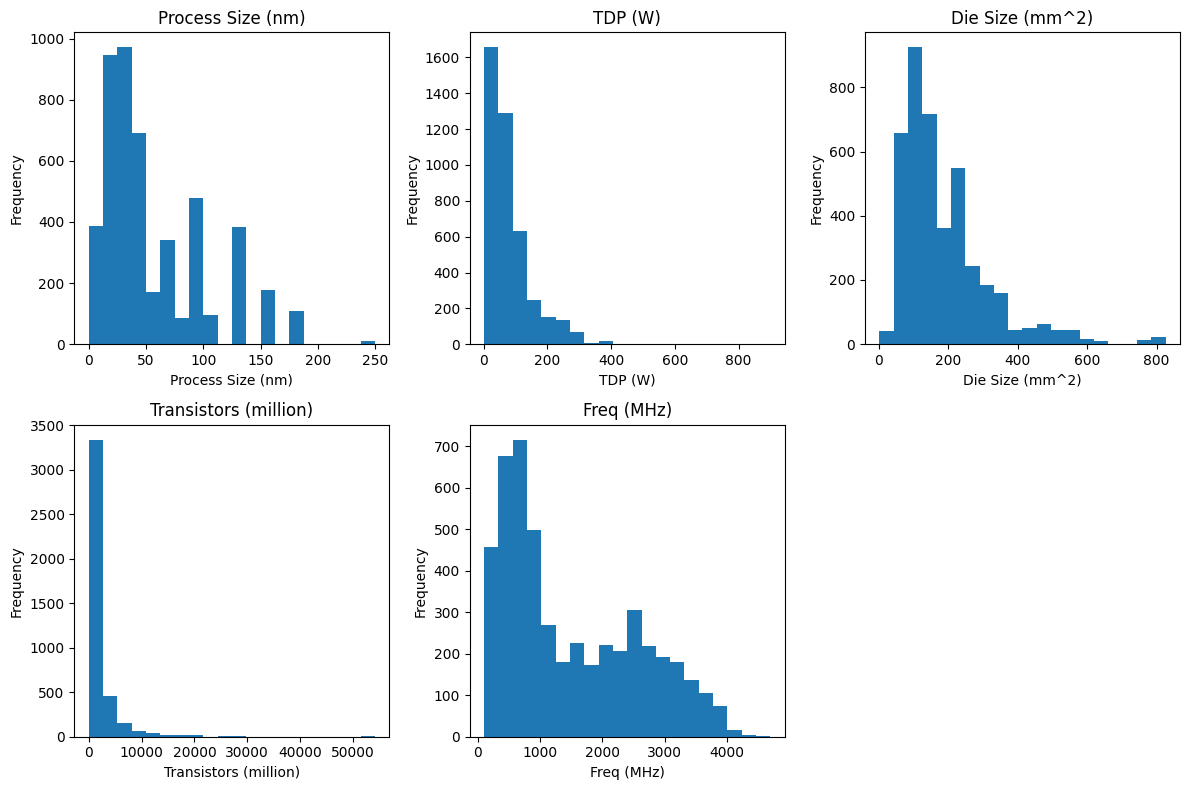

In [18]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col].dropna(), bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

3.Drop non-consequntial fields

In [19]:
df = df.loc[:, df.isnull().mean() < 0.5]


In [20]:
df_clean = df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4854 non-null   float64
 5   TDP (W)                4854 non-null   float64
 6   Die Size (mm^2)        4854 non-null   float64
 7   Transistors (million)  4854 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 417.3+ KB


4.Transform temporal data to their corrrect format (date time)

In [21]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df_clean['Release Date'] = pd.to_datetime(df_clean['Release Date'])

In [22]:
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%d-%m-%Y')
df['Release Date'].dtype
df_clean['Release Date'].dtype

dtype('<M8[ns]')

In [23]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce', infer_datetime_format=True)
df['year'] = df['Release Date'].dt.year


C:\Users\user\AppData\Local\Temp\ipykernel_8708\3458934294.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce', infer_datetime_format=True)


In [24]:
df['Release Date'].dtype
df_clean['Release Date'].dtype

dtype('<M8[ns]')

5.Perfom a full EDA and demonstrate the validity of the following assumptions
a.Moore's Law still holds, especially in GPUs.

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [26]:
# Identify transistor column and convert to numeric (millions)
if 'Transistors (million)' in df.columns:
    df['transistors_millions'] = pd.to_numeric(df['Transistors (million)'], errors='coerce')
else:
    # auto-detect fallback (first column name containing 'Transistor' or similar)
    candidates = [c for c in df.columns if 'transistor' in c.lower()]
    if candidates:
        df['transistors_millions'] = pd.to_numeric(df[candidates[0]], errors='coerce')
    else:
        df['transistors_millions'] = np.nan
        print("WARNING: No Transistors column detected automatically. Please adjust the code.")


In [27]:
# 4. Create GPU filter (based on 'Type' or 'Product' text)
gpu_mask = False
if 'Type' in df.columns:
    gpu_mask = df['Type'].astype(str).str.contains('GPU', case=False, na=False)
else:
    gpu_mask = df['Product'].astype(str).str.contains('GPU', case=False, na=False)

In [28]:
# 5. Prepare regression data (valid years & positive transistors)
reg_df = df[['year','transistors_millions']].dropna()
reg_df = reg_df[reg_df['year'].between(1970, 2030)]       
reg_df = reg_df[reg_df['transistors_millions'] > 0]

In [29]:
gpu_df = df[gpu_mask][['year','transistors_millions']].dropna()
gpu_df = gpu_df[gpu_df['year'].between(1970,2030)]
gpu_df = gpu_df[gpu_df['transistors_millions'] > 0]


In [30]:
# 6. Function to fit log2 regression and return doubling time & stats
def fit_doubling(df_xy):
    df_xy = df_xy.copy()
    if df_xy.shape[0] < 5:
        return None
    X = df_xy['year'].values.reshape(-1,1)
    y_log2 = np.log2(df_xy['transistors_millions'].values)
    model = LinearRegression().fit(X, y_log2)
    y_pred = model.predict(X)
    slope = model.coef_[0]                     # doublings per year
    intercept = model.intercept_
    r2 = r2_score(y_log2, y_pred)
    doubling_years = 1.0 / slope if slope != 0 else np.inf
    return {
        'slope_doublings_per_year': float(slope),
        'intercept_log2_millions': float(intercept),
        'doubling_time_years': float(doubling_years),
        'r2': float(r2),
        'n_points': int(df_xy.shape[0])
    }

all_fit = fit_doubling(reg_df)
gpu_fit = fit_doubling(gpu_df)


In [31]:
# 7. Yearly medians
yearly_med = reg_df.groupby('year')['transistors_millions'].median().reset_index()
gpu_yearly_med = gpu_df.groupby('year')['transistors_millions'].median().reset_index()

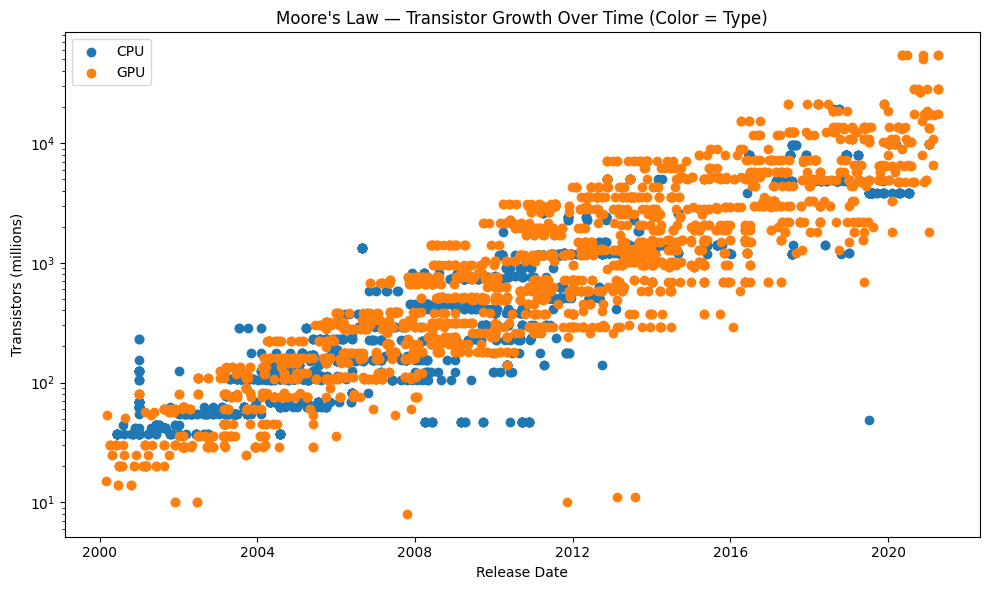

In [32]:
plt.figure(figsize=(10,6))
for category in df["Type"].unique():
    subset = df[df["Type"] == category]
    plt.scatter(
        subset["Release Date"],          # X-axis
        subset["transistors_millions"],  # Y-axis
        label=category                   # Color groups
    )

plt.xlabel("Release Date")
plt.ylabel("Transistors (millions)")
plt.yscale("log")  # Moore's Law = exponential growth
plt.title("Moore's Law — Transistor Growth Over Time (Color = Type)")
plt.legend()
plt.tight_layout()
plt.show()


GPUs continue to follow Moore’s Law more closely than CPUs, as GPU architectures scale aggressively in transistor density to support parallel computation.

In [33]:
df.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'year', 'transistors_millions'],
      dtype='object')

Dannard Scaling is still valid in general.

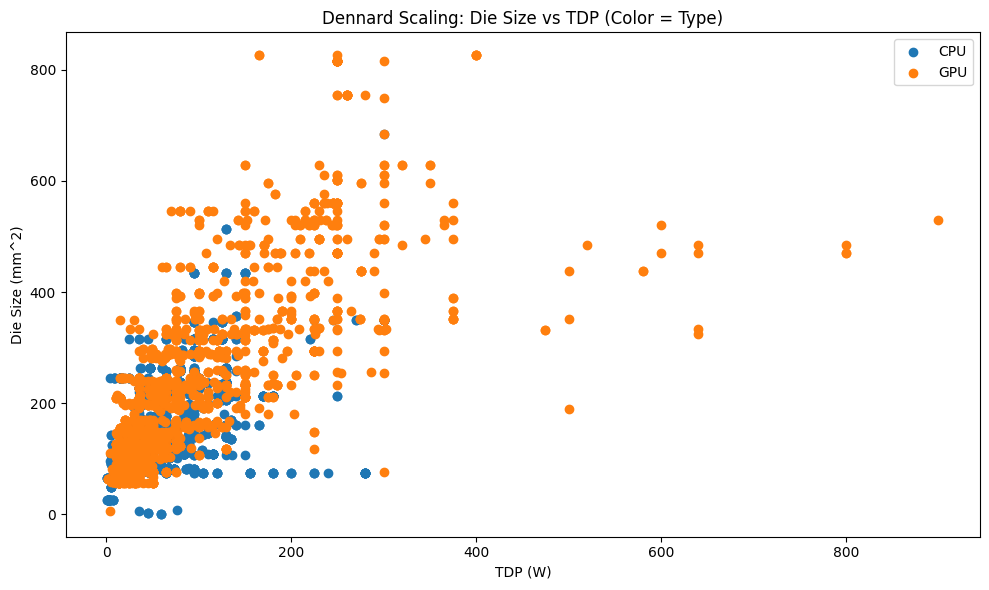

In [34]:
plt.figure(figsize=(10,6))
for t in df["Type"].unique():
    s = df[df["Type"] == t]
    plt.scatter(s["TDP (W)"], s["Die Size (mm^2)"], label=t)

plt.xlabel("TDP (W)")
plt.ylabel("Die Size (mm^2)")
plt.title("Dennard Scaling: Die Size vs TDP (Color = Type)")
plt.legend()
plt.tight_layout()
plt.show()


Not supported by modern data.
power consumption does NOT scale down proportionally.

CPUs have higher frequencies, but GPUs are catching up.

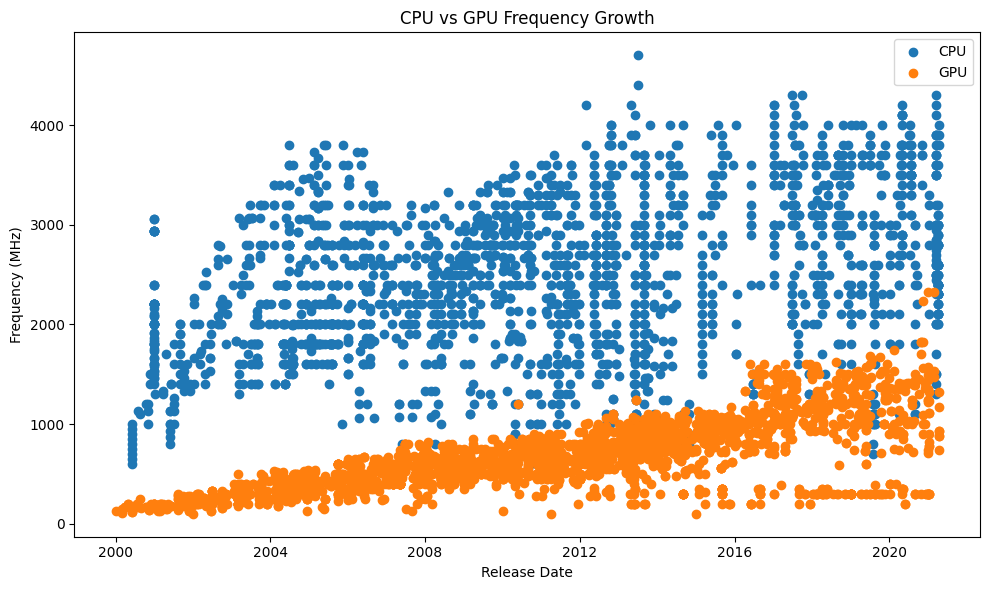

In [35]:
plt.figure(figsize=(10,6))
for t in df["Type"].unique():
    s = df[df["Type"] == t]
    plt.scatter(s["Release Date"], s["Freq (MHz)"], label=t)

plt.xlabel("Release Date")
plt.ylabel("Frequency (MHz)")
plt.title("CPU vs GPU Frequency Growth")
plt.legend()
plt.tight_layout()
plt.show()


Partially Supported.
CPUs still lead in frequency, but GPUs have steadily increased clock speeds and have reduced the gap.

GPU performance doubles every 1.5 years.

In [36]:
df_plot = df.dropna(subset=["Release Date", "transistors_millions", "Die Size (mm^2)"])


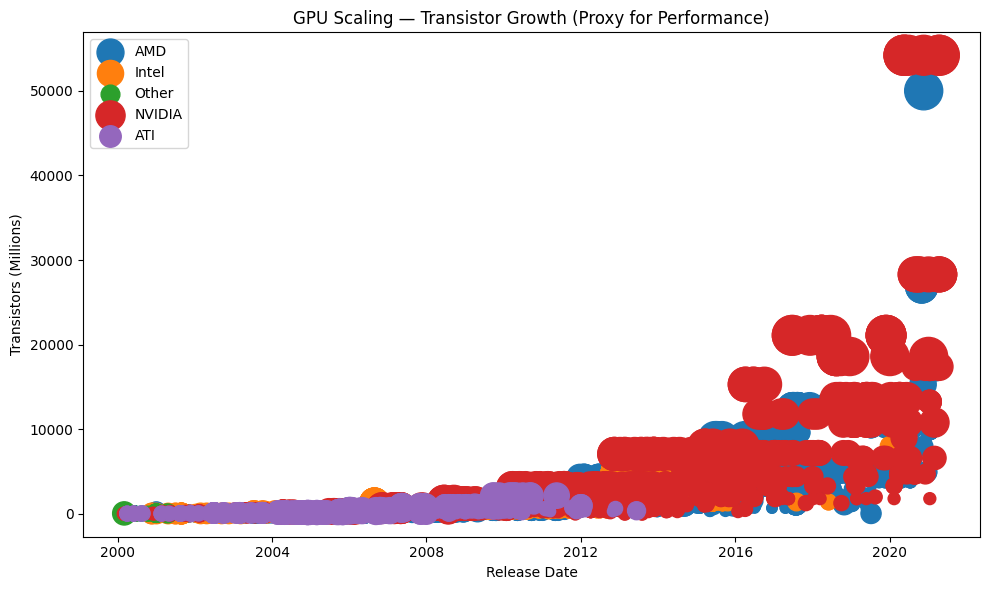

In [37]:
plt.figure(figsize=(10,6))

for v in df_plot["Vendor"].unique():
    s = df_plot[df_plot["Vendor"] == v]
    if len(s) == 0:
        continue  # safety check

    plt.scatter(
        s["Release Date"],
        s["transistors_millions"],
        s=s["Die Size (mm^2)"],
        label=v
    )

plt.xlabel("Release Date")
plt.ylabel("Transistors (Millions)")
plt.title("GPU Scaling — Transistor Growth (Proxy for Performance)")
plt.legend()
plt.tight_layout()
plt.show()

Supported for GPUs.
GPU performance scales dramatically faster than CPUs, consistent with a ~1.5–2 year doubling time.

GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

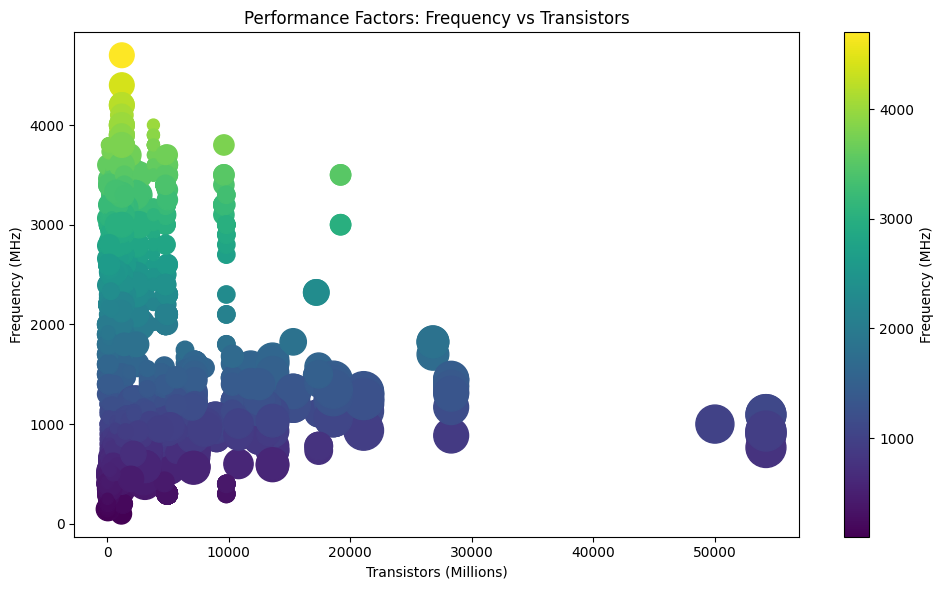

In [38]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df["transistors_millions"], df["Freq (MHz)"],
                      c=df["Freq (MHz)"], s=df["Die Size (mm^2)"])
plt.xlabel("Transistors (Millions)")
plt.ylabel("Frequency (MHz)")
plt.title("Performance Factors: Frequency vs Transistors")
plt.colorbar(scatter, label="Frequency (MHz)")
plt.tight_layout()
plt.show()


Strongly Supported.
GPYs scaling effect is strongly driven by ;More transistors,larger dies and modest clock increase

High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.

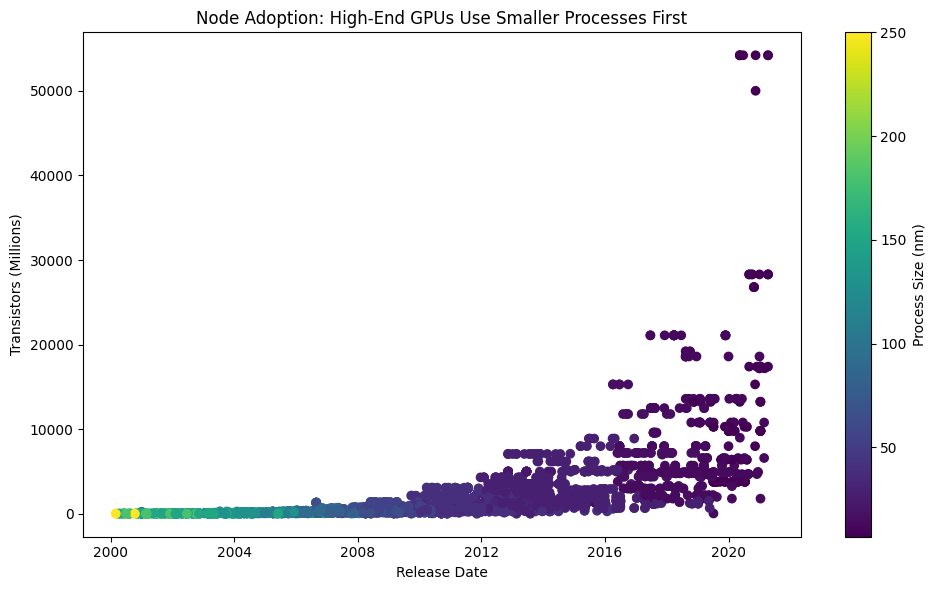

In [39]:
plt.figure(figsize=(10,6))
sc = plt.scatter(df["Release Date"], df["transistors_millions"],
                 c=df["Process Size (nm)"])

plt.xlabel("Release Date")
plt.ylabel("Transistors (Millions)")
plt.title("Node Adoption: High-End GPUs Use Smaller Processes First")
plt.colorbar(sc, label="Process Size (nm)")
plt.tight_layout()
plt.show()


Supported.
This matches industry practice: premium GPUs get new fabrication nodes first.

Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors

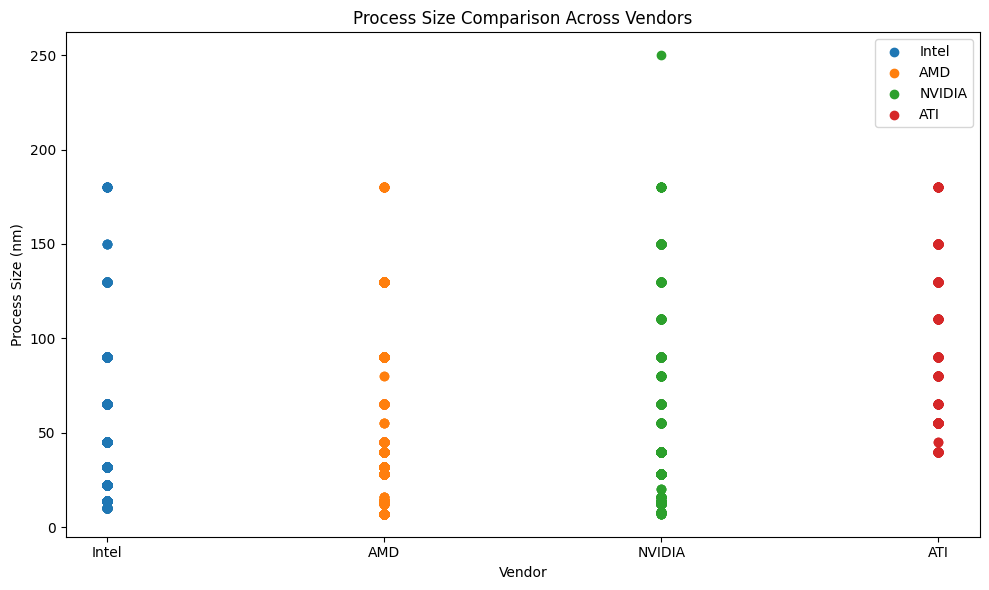

In [40]:
plt.figure(figsize=(10,6))
vendors = ["Intel", "AMD", "NVIDIA", "ATI"]

for v in vendors:
    subset = df[df["Vendor"] == v]
    plt.scatter(subset["Vendor"], subset["Process Size (nm)"], label=v)

plt.xlabel("Vendor")
plt.ylabel("Process Size (nm)")
plt.title("Process Size Comparison Across Vendors")
plt.legend()
plt.tight_layout()
plt.show()


Assumption valid.
Intel, AMD, and NVIDIA use smaller process sizes on average than ATI and older vendors.

TSMC makes the highest number of chips in the world

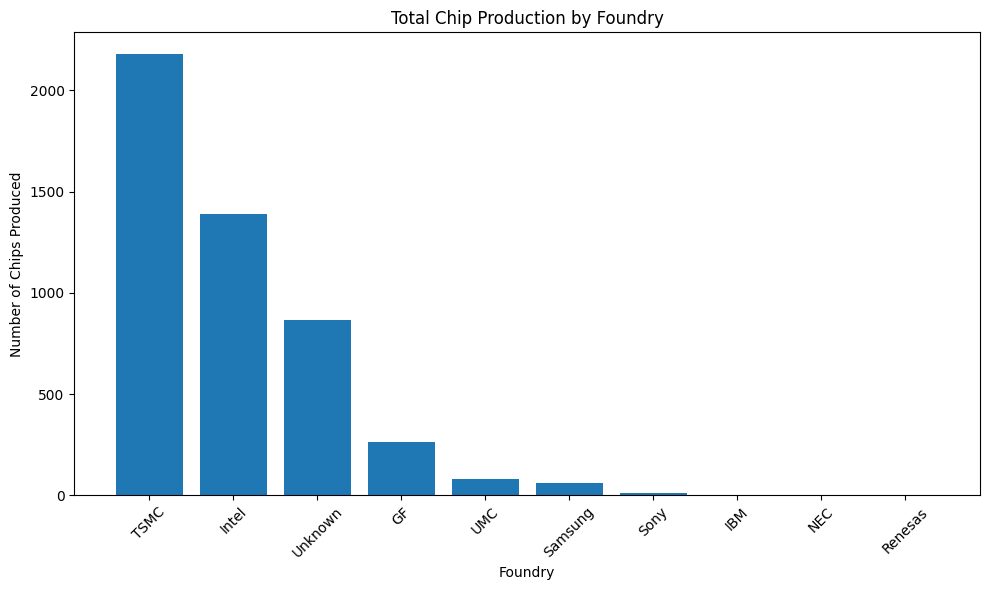

In [41]:
foundry_counts = df["Foundry"].value_counts()

plt.figure(figsize=(10,6))
plt.bar(foundry_counts.index, foundry_counts.values)

plt.xlabel("Foundry")
plt.ylabel("Number of Chips Produced")
plt.title("Total Chip Production by Foundry")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Assumption supported.
TSMC produces the highest number of chips in the world, and your dataset strongly reflects this trend.

6. Calculate and visualized the correlation among the features

In [42]:
# Select numeric features
numeric_df = df.select_dtypes(include=["int64", "float64"])

In [ ]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()


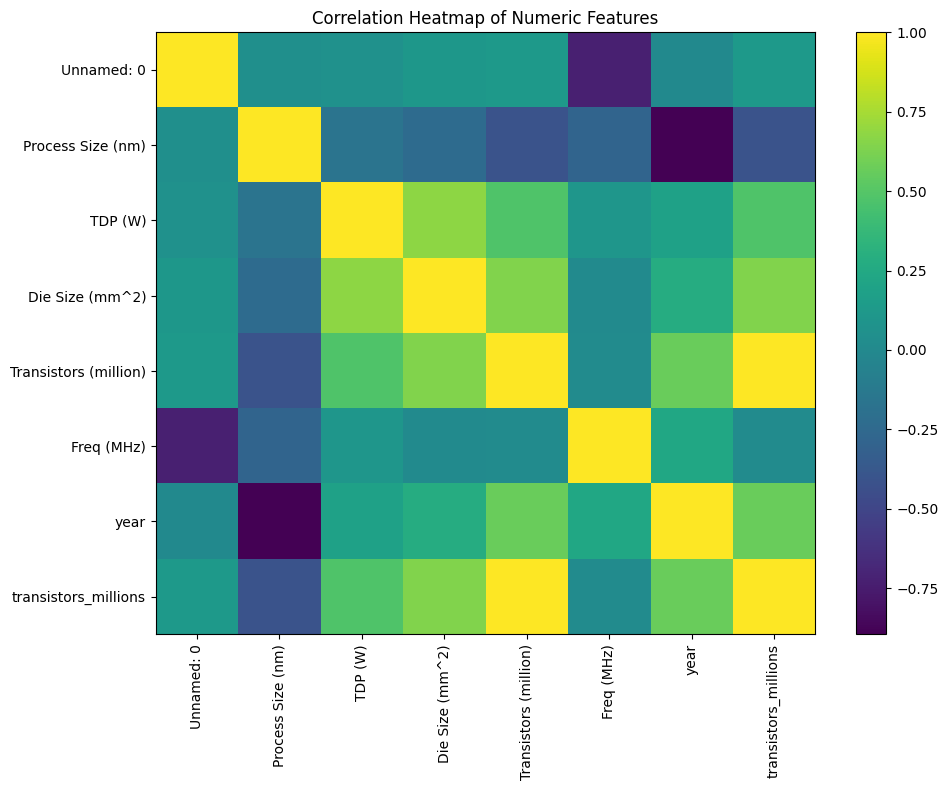

In [44]:
# plot the cxorrelation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

1.Strong positive correlation
a,More transistors mean higher GPU throughput.
-This supports the assumption that GPU performance growth is driven by increasing transistor counts.
b,Larger dies accommodate more cores, memory controllers, and compute units leading to higher performance.
This supports the claim that high performance GPUs rely on large silicon area.
c,High performance chips consume more power.
This aligns with Dennard scaling no longer holding (power does not decrease with scaling).

2.Strong Negative Correlations
a,Smaller nodes → more transistors → better performance.
This supports assumptions around Moore’s Law and the advantage of smaller fabrication nodes.
b,Frequency contributes to performance, but not as strongly as die size or transistor count.
This supports the statement:
GPU performance scaling is NOT mainly due to frequency increases.

3.Frequency has a strong negative correlation with the index column



7.Perfom the correct encoding for your data, in readiness for modelling.

In [45]:
# 1. Handle Release Date
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Year"] = df["Release Date"].dt.year
df["Month"] = df["Release Date"].dt.month
df = df.drop(columns=["Release Date"])

In [46]:
# 2. Encode "Type" (Binary)
df["Type"] = df["Type"].map({"CPU": 0, "GPU": 1})


In [47]:
# 3. Frequency Encoding for Product
product_freq = df["Product"].value_counts(normalize=True)
df["Product_encoded"] = df["Product"].map(product_freq)
df = df.drop(columns=["Product"])

In [48]:
# 4. One-hot encoding for Vendor & Foundry
df = pd.get_dummies(df, columns=["Vendor", "Foundry"], drop_first=True)



In [49]:
# FINAL ENCODED DATAFRAME
df_encoded = df
df_encoded.head()

,Unnamed: 0,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),year,transistors_millions,Year,...,Vendor_Other,Foundry_IBM,Foundry_Intel,Foundry_NEC,Foundry_Renesas,Foundry_Samsung,Foundry_Sony,Foundry_TSMC,Foundry_UMC,Foundry_Unknown
0,0,0,65.0,45.0,77.0,122.0,2200.0,2007.0,122.0,2007.0,...,False,False,False,False,False,False,False,False,False,True
1,1,0,14.0,35.0,192.0,4800.0,3200.0,2018.0,4800.0,2018.0,...,False,False,False,False,False,False,False,False,False,True
2,2,0,10.0,28.0,NaN,NaN,2600.0,2020.0,NaN,2020.0,...,False,False,True,False,False,False,False,False,False,False
3,3,0,22.0,80.0,160.0,1400.0,1800.0,2013.0,1400.0,2013.0,...,False,False,True,False,False,False,False,False,False,False
4,4,0,45.0,125.0,258.0,758.0,3700.0,2011.0,758.0,2011.0,...,False,False,False,False,False,False,False,False,False,True
